<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/(LearingRate)_DUDL_ANN_classifyQwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraies
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats('svg')

In [9]:
# create data 
def createData():
  nPerClust = 100
  blur = 1

  A = [1, 1]
  B = [5, 1]

  # generate data
  a = [A[0] + np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
  b = [B[0] + np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

  # true labels
  labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))
  # concatenate into a matrix
  data_np = np.hstack((a, b)).T
  # convert to a pytorch tensor
  data = torch.tensor(data_np).float()
  labels = torch.tensor(labels_np).float()
  return data, labels

  # # show the data
  # fig = plt.figure(figsize=(5,5))
  # plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
  # plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
  # plt.title('The qwerties')
  # plt.xlabel('qwerty dimension 1')
  # plt.ylabel('qwerty dimension 2')
  # plt.show()

In [10]:
# inspect types
# print(type(data_np))
# print(np.shape(data_np))
# print(' ')
# print(type(data))
# print(np.shape(data))

In [11]:
# build the model
def build_n_train_model(data, labels, learningRate = .01):
  ANNclassify = nn.Sequential(
      nn.Linear(2, 1),
      nn.ReLU(),
      nn.Linear(1, 1),
      nn.Sigmoid()
  )

  # loss function
  lossfun = nn.BCELoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  # train the model
  numepochs = 1000
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return losses



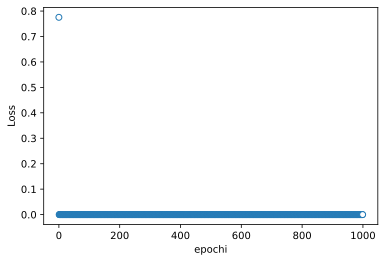

In [16]:
# test it once

data, labels = createData()
losses = build_n_train_model(data, labels)

# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('epochi')
plt.ylabel('Loss')
plt.show()


In [12]:
learningRates = np.linspace(0.001, 0.1, 15)
learningRates

array([0.001     , 0.00807143, 0.01514286, 0.02221429, 0.02928571,
       0.03635714, 0.04342857, 0.0505    , 0.05757143, 0.06464286,
       0.07171429, 0.07878571, 0.08585714, 0.09292857, 0.1       ])

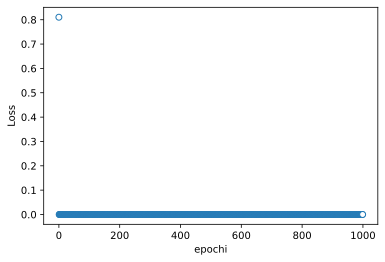

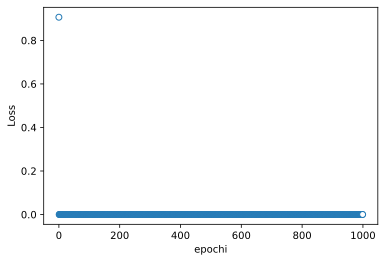

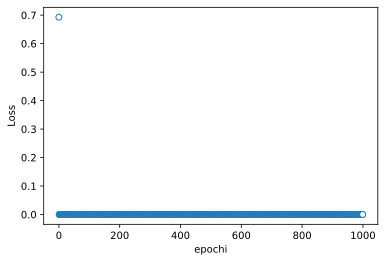

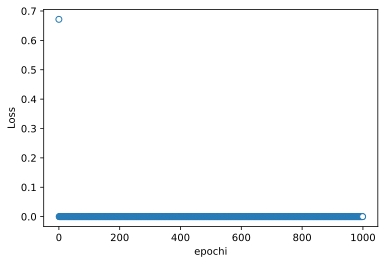

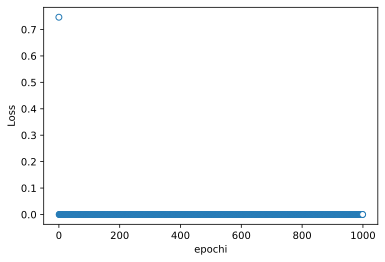

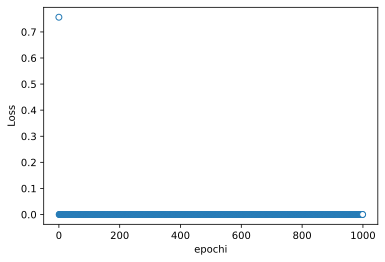

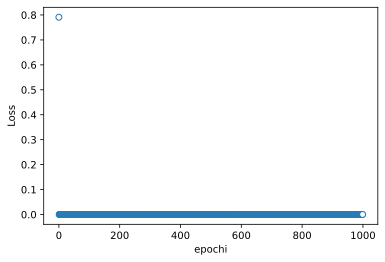

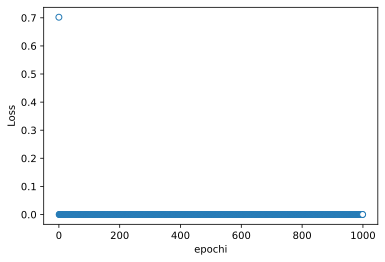

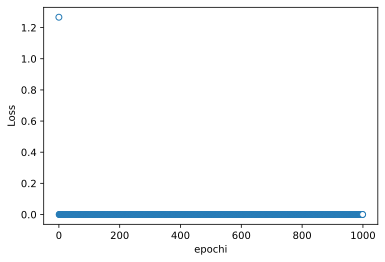

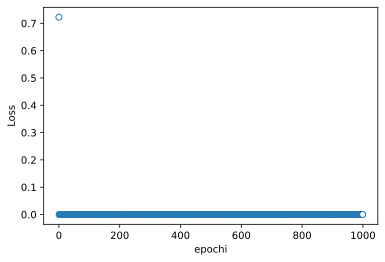

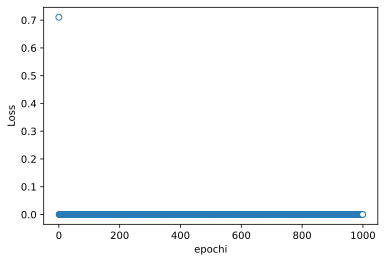

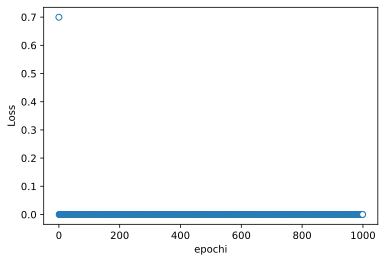

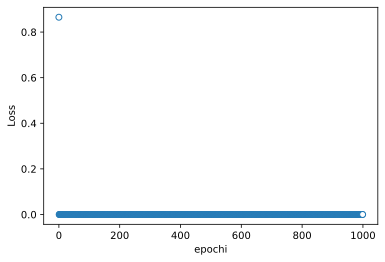

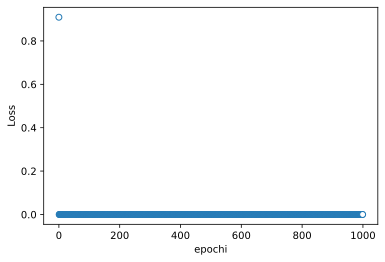

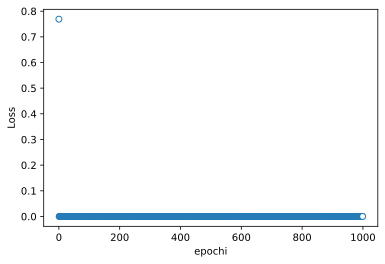

In [13]:
for lr in learningRates:
  data, labels = createData()
  losses = build_n_train_model(data, labels, learningRate=lr)

  # show the losses
  plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
  plt.xlabel('epochi')
  plt.ylabel('Loss')
  plt.show()

In [ ]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions > .5

# final errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100*len(misclassified) / (2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 78%


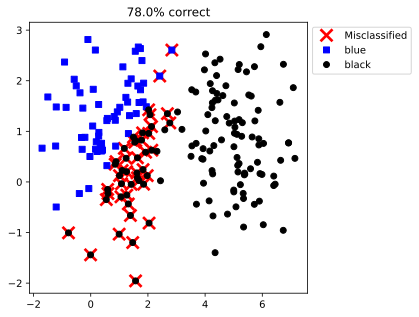

In [ ]:
# plot the label data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=2.7)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0], 1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1, 1))
plt.title(f'{totalacc}% correct')
plt.show()


In [20]:
def createANNModel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, 1),
      nn.ReLU(),
      nn.Linear(1, 1)
  )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  # model output
  return ANNclassify, lossfun, optimizer

In [17]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel, lossfun, optimizer):

  # initialize losses

  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)
    
    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: shouldn't it bee predictions > .5??
  totalacc = 100*torch.mean(((predictions > 0) == labels).float())

  return losses, predictions, totalacc

## Test the new code by running it once

Final accuracy: 53%


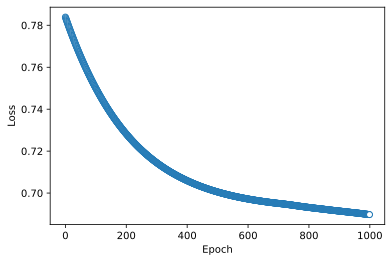

In [22]:
# create everything
ANNclassify, lossfun, optimizer = createANNModel(.01)

# run it
losses, predictions, totalacc = trainTheModel(ANNclassify, lossfun, optimizer)

# report accuracy
print('Final accuracy: %g%%' %totalacc)

# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

## Now for the experiment

In [27]:
# the set of learing rates to test
learningrates = np.linspace(.001, .1, 40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

# loop through learning rates
for i, lr in enumerate(learningrates):

  # create and run the model
  ANNclassify, lossfun, optimizer = createANNModel(lr)
  losses, predictions, totalacc = trainTheModel(ANNclassify, lossfun, optimizer)

  # store the results
  accByLR.append(totalacc)
  allLosses[i, :] = losses.detach()



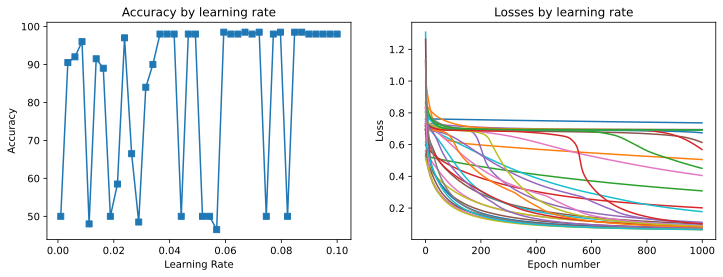

In [28]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [29]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7000)

## Run a meta experiment to get more reliable results

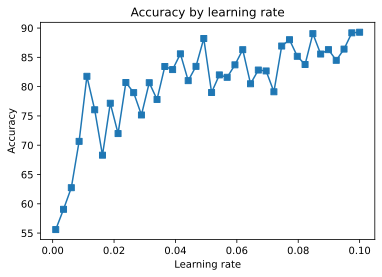

In [31]:
# run a "meta-experiment" by repeating the experiment N times
# (different random weight initializations each time)
# note: this cell takes ~7 mins.

# number of times to iterate through the experiment
numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps, len(learningrates)))

# fewer epochs to reduce computation time
numepochs = 500

# now for the experiment
for expi in range(numExps):
  for i, lr in enumerate(learningrates):

    # create and run the model
    ANNclassify, lossfun, optimizer = createANNModel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify, lossfun, optimizer)

    # store the result
    accMeta[expi, i] = totalacc

# now plot the results, averaged over experiments
plt.plot(learningrates, np.mean(accMeta, axis=0), 's-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()
